R-squared Score: 0.9500941251829782
Mean Squared Error (MSE): 612.5737170313873


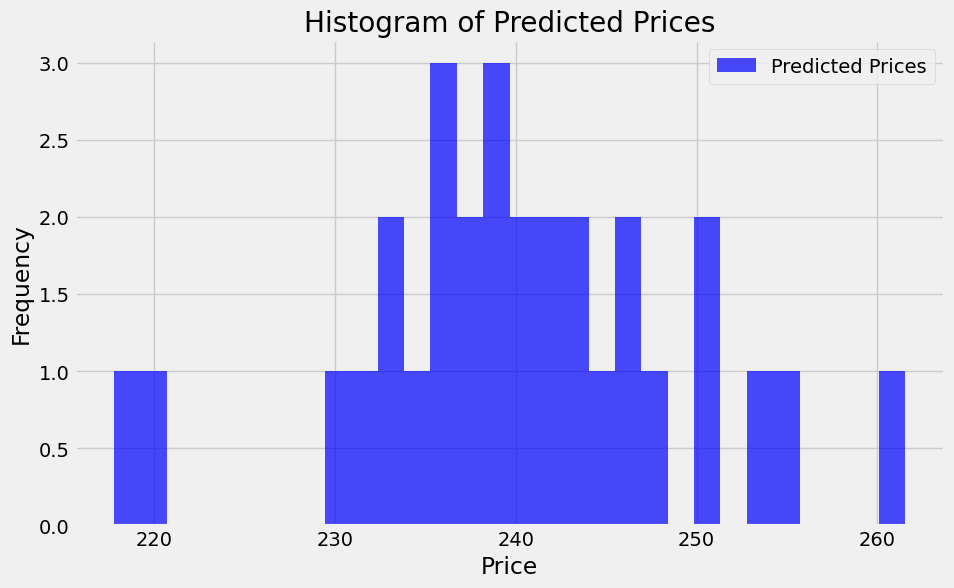

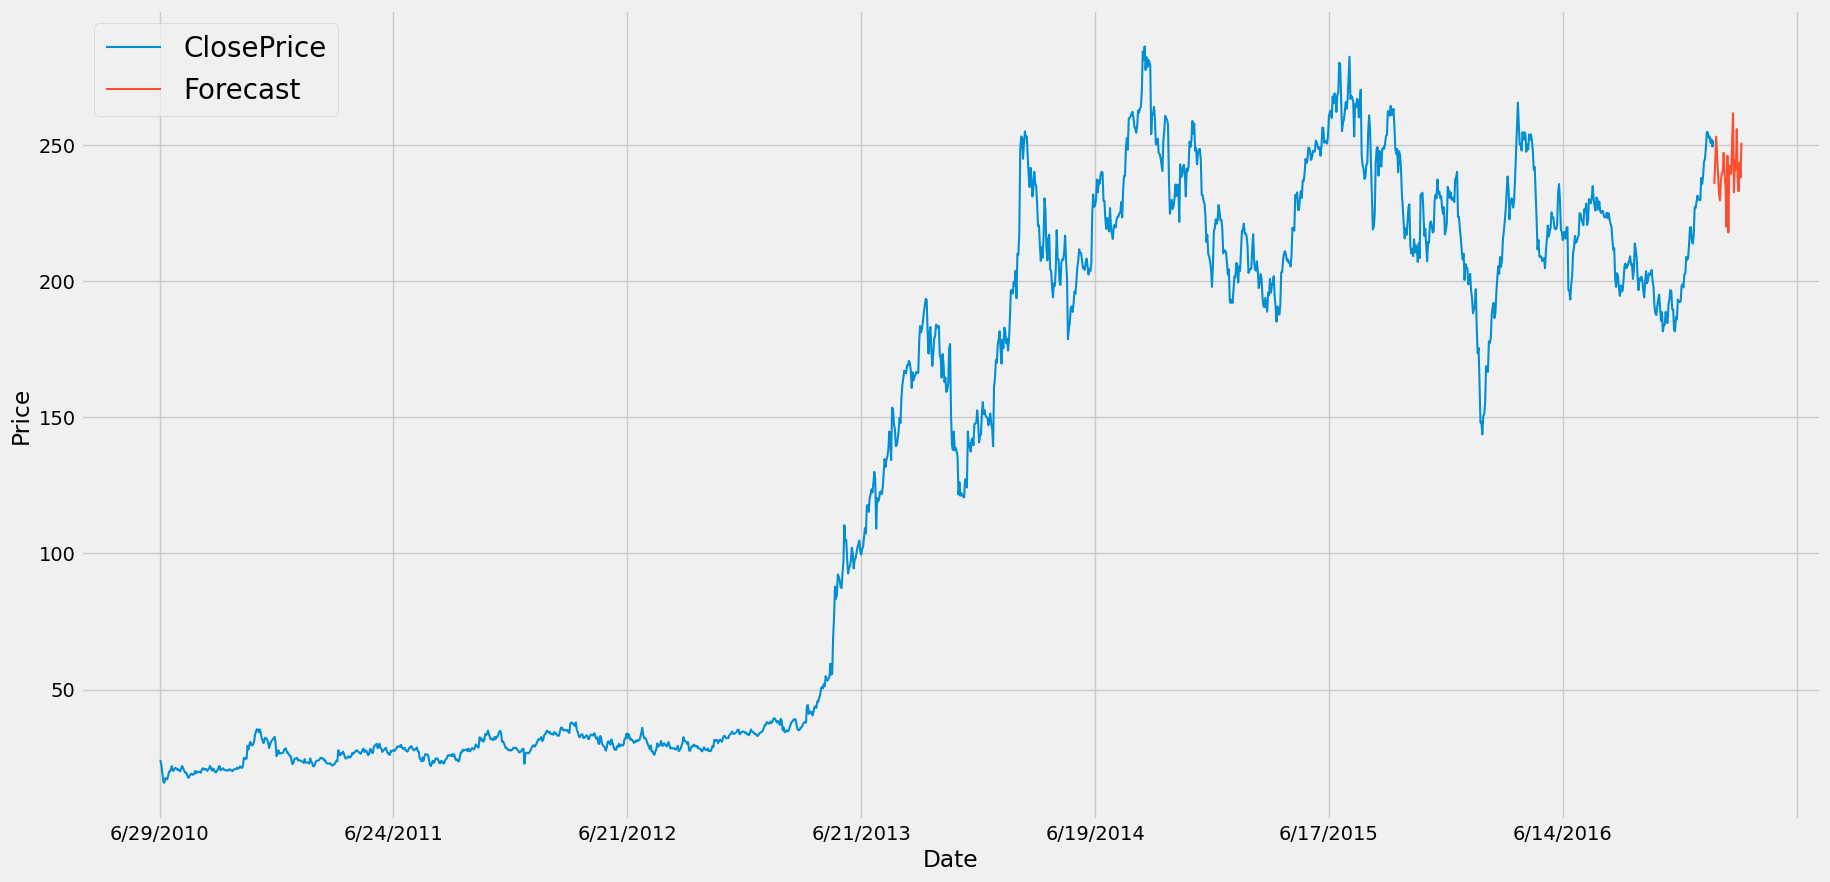

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib import style

style.use("fivethirtyeight")

# Read the csv file into a DataFrame
df = pd.read_csv("Tesla_stocks.csv")

# Make two new columns which will be used for making predictions.
df["HL_Perc"] = (df["High"] - df["Low"]) / df["Low"] * 100
df["CO_Perc"] = (df["Close"] - df["Open"]) / df["Open"] * 100

# Make array of dates
# Last 30 dates will be used for forecasting.
dates = np.array(df["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

df = df[["HL_Perc", "CO_Perc", "Adj Close", "Volume"]]

# Define the label column
df["PriceNextMonth"] = df["Adj Close"].shift(-30)

# Make feature and label arrays
X = np.array(df.drop("PriceNextMonth", axis=1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
df.dropna(inplace=True)
y = np.array(df["PriceNextMonth"])

# Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the prediction model
model = RandomForestRegressor()

# Fit the model using training data
model.fit(X_train, y_train)

# Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(f"R-squared Score: {conf}")

# Fit the model again using the whole data set
model.fit(X, y)

# Make predictions
predictions = model.predict(X_Check)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y[-30:], predictions)
print(f"Mean Squared Error (MSE): {mse}")

# Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns=["Date"])
actual["ClosePrice"] = df["Adj Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace=True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace=True)
var = [actual, forecast]
result = pd.concat(var)  # This is the final DataFrame

# Plot the histogram for predicted prices
plt.figure(figsize=(10, 6))
plt.hist(predictions, bins=30, color='blue', alpha=0.7, label='Predicted Prices')
plt.title('Histogram of Predicted Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot the results
result.plot(figsize=(20, 10), linewidth=1.5)
plt.legend(loc=2, prop={'size': 20})
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
